<h1>Chapter 3 | <b>Extra</b> Data Exercise |  Power-law distributions with Brazilian cities</h1>

<p>This notebook will focus on power-law distributions using Brazilian cities distributed by population size.</p>

<h2>Clean the data</h2>
<p>Let's import the required libraries and set up our working directories.</p>


In [1]:
import os
import numpy as np
import pandas as pd
from plotnine import *
import sys
from mizani.formatters import percent_format

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'c:\\Users\\Felipe\\python_work\\Projects\\bk_data_analysis\\da_data_exercises\\ch03-exploratory_data_analysis\\extra-cities_distribution'

In [3]:
# Get current script folder
current_path = os.getcwd()
dirname = f"{current_path}/data/"

# Get location folders
data_in = f"{dirname}raw/"
data_out = f"{dirname}clean/"
func = f"{dirname.split('da_data_exercises')[0]}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
# Import the prewritten helper functions
from py_helper_functions import  *

In [5]:
city_size = pd.read_csv(f"{data_in}pop_municipios_clean.csv")

In [6]:
city_size.head()

,ano,sigla_uf,id_municipio,populacao,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,1991,RO,1100015,31981,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
1,1992,RO,1100015,34768,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
2,1993,RO,1100015,37036,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
3,1994,RO,1100015,39325,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11
4,1995,RO,1100015,41574,1100015,Alta Floresta D'Oeste,-11.9283,-61.9953,0,11


In [7]:
# Get values for year 2022 only
city_size_cut = city_size.loc[lambda x: x["ano"] == 2022]

In [8]:
city_size_cut.head()

,ano,sigla_uf,id_municipio,populacao,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
31,2022,RO,1100015,21558,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
63,2022,RO,1100023,100896,1100023,Ariquemes,-9.90571,-63.0325,0,11
95,2022,RO,1100031,5107,1100031,Cabixi,-13.49450,-60.5520,0,11
127,2022,RO,1100049,92202,1100049,Cacoal,-11.43430,-61.4562,0,11
159,2022,RO,1100056,15237,1100056,Cerejeiras,-13.18700,-60.8168,0,11


In [9]:
city_size_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 31 to 173852
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           5570 non-null   int64  
 1   sigla_uf      5570 non-null   object 
 2   id_municipio  5570 non-null   int64  
 3   populacao     5570 non-null   int64  
 4   codigo_ibge   5570 non-null   int64  
 5   nome          5570 non-null   object 
 6   latitude      5570 non-null   float64
 7   longitude     5570 non-null   float64
 8   capital       5570 non-null   int64  
 9   codigo_uf     5570 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 478.7+ KB


<h2>Create variables + visualize the data</h2>

In [10]:
city_size_cut["lnpopulacao"] = np.log(city_size_cut["populacao"])
city_size_cut = city_size_cut.sort_values(by="populacao", ascending=False).reset_index(drop=True)
city_size_cut["rank"] = [x for x in range(1, len(city_size_cut["populacao"]) + 1)]

In [11]:
city_size_cut

,ano,sigla_uf,id_municipio,populacao,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,lnpopulacao,rank
0,2022,SP,3550308,12200180,3550308,São Paulo,-23.53290,-46.6395,1,35,16.316961,1
1,2022,RJ,3304557,6625849,3304557,Rio de Janeiro,-22.91290,-43.2003,1,33,15.706489,2
2,2022,DF,5300108,2923369,5300108,Brasília,-15.77950,-47.9297,1,53,14.888247,3
3,2022,BA,2927408,2610987,2927408,Salvador,-12.97180,-38.5011,1,29,14.775239,4
4,2022,CE,2304400,2596157,2304400,Fortaleza,-3.71664,-38.5423,1,23,14.769543,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,2022,SP,3532868,1059,3532868,Nova Castilho,-20.76150,-50.3477,0,35,6.965080,5566
5566,2022,MT,5101209,998,5101209,Araguainha,-16.85700,-53.0318,0,51,6.905753,5567
5567,2022,GO,5201207,927,5201207,Anhanguera,-18.33390,-48.2204,0,52,6.831954,5568
5568,2022,SP,3507209,877,3507209,Borá,-22.26960,-50.5409,0,35,6.776507,5569


In [12]:
city_size_cut

,ano,sigla_uf,id_municipio,populacao,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,lnpopulacao,rank
0,2022,SP,3550308,12200180,3550308,São Paulo,-23.53290,-46.6395,1,35,16.316961,1
1,2022,RJ,3304557,6625849,3304557,Rio de Janeiro,-22.91290,-43.2003,1,33,15.706489,2
2,2022,DF,5300108,2923369,5300108,Brasília,-15.77950,-47.9297,1,53,14.888247,3
3,2022,BA,2927408,2610987,2927408,Salvador,-12.97180,-38.5011,1,29,14.775239,4
4,2022,CE,2304400,2596157,2304400,Fortaleza,-3.71664,-38.5423,1,23,14.769543,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,2022,SP,3532868,1059,3532868,Nova Castilho,-20.76150,-50.3477,0,35,6.965080,5566
5566,2022,MT,5101209,998,5101209,Araguainha,-16.85700,-53.0318,0,51,6.905753,5567
5567,2022,GO,5201207,927,5201207,Anhanguera,-18.33390,-48.2204,0,52,6.831954,5568
5568,2022,SP,3507209,877,3507209,Borá,-22.26960,-50.5409,0,35,6.776507,5569


In [13]:
# Get ln(rank) vs ln(x)
city_size_cut["lnrank"] = np.log(city_size_cut["rank"])

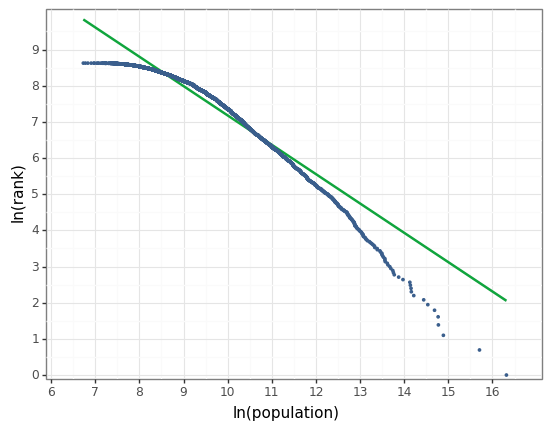

<ggplot: (178732034277)>

In [14]:
ggplot(city_size_cut, aes(x="lnpopulacao", y="lnrank")) + geom_smooth(
    color=color[1], method="lm"
) + geom_point(color=color[0], size=0.5, alpha=0.5) + labs(
    x="ln(population)", y="ln(rank)"
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(6, 17), breaks=seq(6, 17, by=1)
) + theme_bw()

In [15]:
ggplot(city_size_cut, aes(x="populacao", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=100000,siz
) + geom_text(
    aes(label="[round(x,1) for x in stat(count)/sum(stat(count))*100]"),
    stat="count",
    size=10,
    nudge_y=0.01,
) + labs(
    x="population", y="Share of population(percent)"
) + scale_x_continuous(
    expand=(0.05, 0.05), limits=(800,12500000), breaks=seq(800, 12500000, by=1000000)
) + scale_y_continuous(
    expand=(0, 0),
    limits=(0, 0.1),
    breaks=seq(0, 0.10, by=0.01),
    labels=percent_format(),
) + theme_bw()

SyntaxError: positional argument follows keyword argument (228674322.py, line 3)

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [ ]:
population_original = np.array(city_size_cut["populacao"])
lnpopulation = city_size_cut["lnpopulacao"]

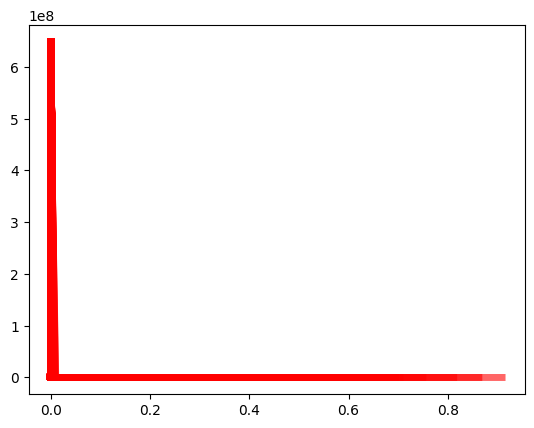

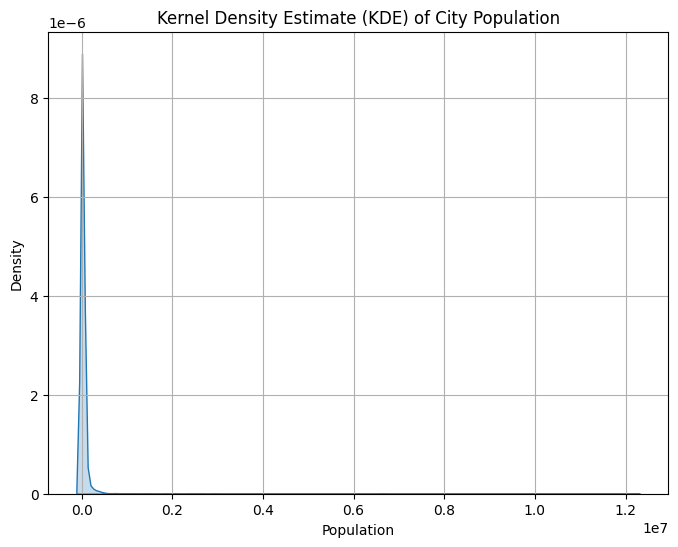

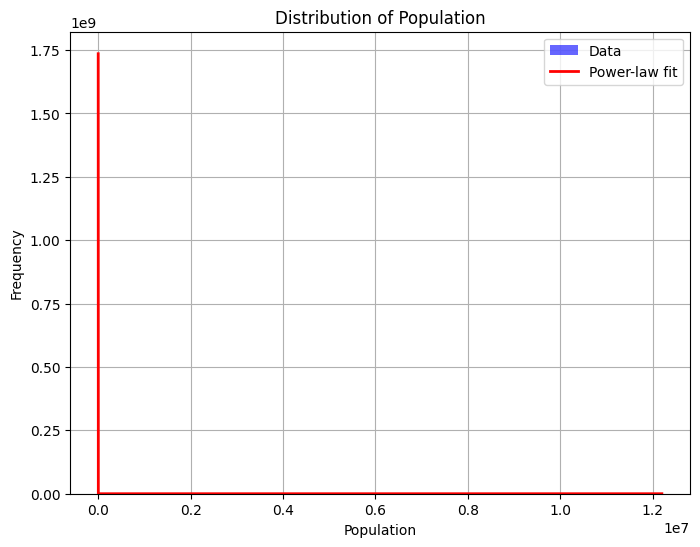

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Kernel Density Estimate (KDE) of City Population")
plt.xlabel("Population")
plt.ylabel("Density")
plt.grid(True)

#KDE Plot
sns.kdeplot(population_original, shade=True)
plt.show()

# Plot the distribution with a fitted power-law curve
plt.figure(figsize=(8, 6))
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.grid(True)

# Histogram
plt.hist(
    population_original, 
    bins=50, 
    density=True,
    alpha=0.6,
    color="b",
    label="Data")

# Fit a power-law distribution to the data
alpha, loc, scale = stats.powerlaw.fit(population_original)
pdf = stats.powerlaw.pdf(np.sort(population_original), alpha, loc, scale)
plt.plot(np.sort(population_original), pdf, "r", linewidth=2, label="Power-law fit")

plt.legend()
plt.show()

In [ ]:
ln_populacao = city_size_cut["lnpopulacao"]
ln_rank = city_size_cut["lnrank"]

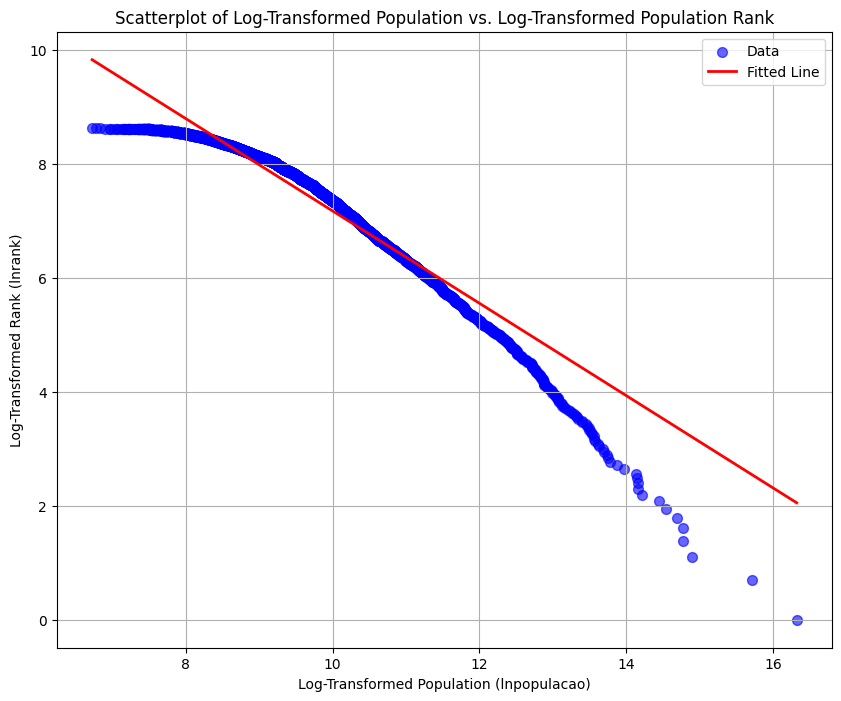

In [ ]:
# Plot the scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(ln_populacao,
            ln_rank, 
            s=50, 
            alpha=0.6, 
            color="b",
            label="Data")

# Fit a line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(ln_populacao, ln_rank)
fit_line = slope * ln_populacao + intercept

# Calculate the predicted values using the fitted line
predicted_values = slope * ln_populacao + intercept

# Calculate the residuals
residuals = ln_rank - predicted_values

# Plot the fitted line
plt.plot(
    ln_populacao, 
    fit_line, "r", 
    linewidth=2, 
    label="Fitted Line")

plt.title("Scatterplot of Log-Transformed Population vs. Log-Transformed Population Rank")
plt.xlabel("Log-Transformed Population (lnpopulacao)")
plt.ylabel("Log-Transformed Rank (lnrank)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
residuals_mean = np.mean(residuals)
results_df = pd.DataFrame({
    "Attribute": [
        "Slope of Fitted Line", "Intercept", 
        "R-squared", "P-value", 
        "Standard Error", "Residuals"],
    "Value":[slope, intercept, r_value**2, p_value, std_err, residuals_mean]
})



In [ ]:
results_df

,Attribute,Value
0,Slope of Fitted Line,-8.113108e-01
1,Intercept,1.529133e+01
2,R-squared,9.385365e-01
3,P-value,0.000000e+00
4,Standard Error,2.782407e-03
5,Residuals,-3.775954e-16


<p>Assessing the results:</p>
<ul>
<li><b>Slope of the Fitted Line</b>. With a value of <code>-0.811311</code>, it is very close to <code>-1</code>, a benchmark value for power-law distribution data.</li>
<li><b>R-squared</b>. It measures how well the fitted line explains the variance in the data and ranges from 0 to 1, where 1 indicates a perfect fit. Here, the R-squared is <b>high</b> and suggests that the fitted line explains about <b>93.85%</b> of the variance in the long-transformed rank. Therefore, it indicates a relatively <b>strong linear relationship</b> between log-transformed population and log-transformed rank.</li>
<li><b>P-value</b>. It represents the probability that the relationship between the log-transformed variables is due to chance. Our value is <code>0.00000</code>, which indicates that the relationship is <b>statistically significant</b>. In other words, it means that there is strong evidence to reject the null hypothesis that there is no relationship between the two varibles.</li>
<li><b>Standard Error</b>. It measures the <b>accuracy</b> of the slope estimate, in which smaller values indicate a more precise estimate of the slope. Here, the value is very small, <code>0.002782</code>, indicating that the slope's estimation is relatively <b>precise</b>.
</li>
</ul>
<p>Overall, we can say that we are dealing with a strong inverse relationship between the two variables, which aligns well with power-law distribution. 

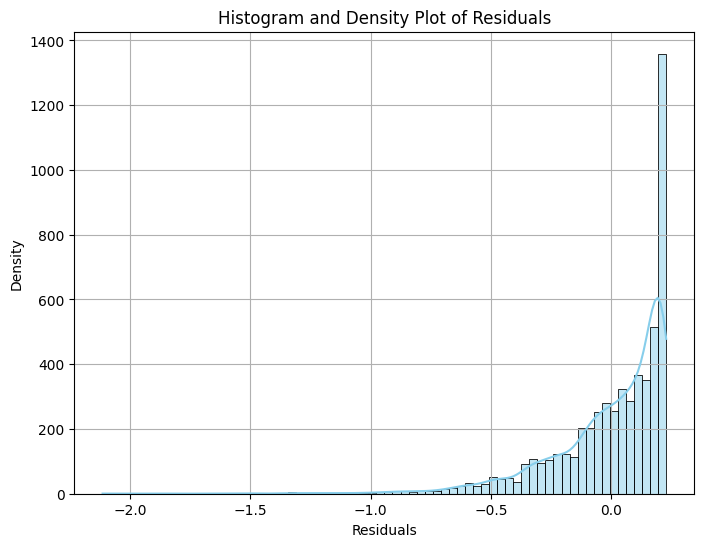

In [ ]:
# Plot a histogram and density plot of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="skyblue")
plt.title("Histogram and Density Plot of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid("True")
plt.show()

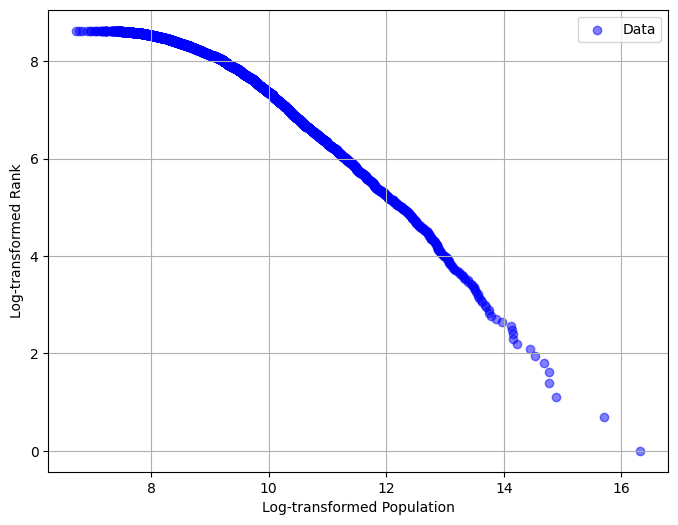

Optimal A:  65.59502044029156
Optimal k:  -0.964262599695607


In [ ]:
# Define the power-law function
def power_law(x, A, k):
    return A * x**k

# Fit the power-law regression model
popt, pcov = curve_fit(power_law, ln_populacao, ln_rank)

# Extract the parameters (A and k) from the optimal fit
A_optimal, k_optimal = popt

# Generate the predicted values using optimal parameters
predicted_values_powerlaw = power_law(ln_populacao, A_optimal, k_optimal)

# Plot the original data and the power-law regression fit
plt.figure(figsize=(8, 6))
plt.scatter(ln_populacao, ln_rank, label="Data", color="blue", alpha=0.5)
plt.xlabel("Log-transformed Population")
plt.ylabel("Log-transformed Rank")
plt.legend()
plt.grid()
plt.show()

# Display the optimal parameters
print("Optimal A: " , A_optimal)
print("Optimal k: ", k_optimal)